In [12]:
!python --version

Python 3.11.6


In [13]:
# GCS에서 Parquet 파일 불러오기 (hackle 관련 데이터)

import os
import pandas as pd
from google.cloud import storage

# hackle_events = pd.read_parquet("gs://sprintda05_final_project/hackle/hackle_events.parquet", engine='pyarrow')
hackle_events = pd.read_parquet("gs://sprintda05_final_project/processed/hackle_events_processed.parquet", engine='pyarrow') # 전처리 데이터
hackle_device_properties = pd.read_parquet("gs://sprintda05_final_project/hackle/device_properties.parquet", engine='pyarrow')
hackle_user_properties = pd.read_parquet("gs://sprintda05_final_project/hackle/user_properties.parquet", engine='pyarrow')
hackle_properties = pd.read_parquet("gs://sprintda05_final_project/hackle/hackle_properties.parquet", engine='pyarrow')


In [14]:
# GCS에서 Parquet 파일 불러오기 (votes 관련 데이터)

import os
import pandas as pd
from google.cloud import storage

accounts_attendance = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_attendance.parquet", engine='pyarrow') # 출석 테이블
# accounts_blockrecord = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_blockrecord.parquet", engine='pyarrow')
accounts_blockrecord = pd.read_parquet("gs://sprintda05_final_project/processed/accounts_blockrecord_processed.parquet", engine='pyarrow') # 차단 기록 테이블 (전처리)
accounts_failpaymenthistory = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_failpaymenthistory.parquet", engine='pyarrow') # 상품 구매 실패 기록 테이블
accounts_friendrequest = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_friendrequest.parquet", engine='pyarrow') # 친구 요청 테이블
accounts_group = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_group.parquet", engine='pyarrow') # 학급 테이블
accounts_nearbyschool = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_nearbyschool.parquet", engine='pyarrow') # 가까운 학교를 기록해두기 위한 관계형 테이블
accounts_paymenthistory = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_paymenthistory.parquet", engine='pyarrow') # 구매 기록 테이블
accounts_user_contacts = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_user_contacts.parquet", engine='pyarrow') # 유저 컨택 테이블
accounts_pointhistory = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_pointhistory.parquet", engine='pyarrow') # 포인트 기록 테이블
accounts_school = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_school.parquet", engine='pyarrow') # 학교 테이블
accounts_timelinereport = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_timelinereport.parquet", engine='pyarrow') # 유저 신고 기록 테이블
# accounts_user = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_user.parquet", engine='pyarrow')
accounts_user = pd.read_parquet("gs://sprintda05_final_project/processed/accounts_user_processed.parquet", engine='pyarrow') # 유저 테이블 (전처리)
# accounts_userquestionrecord = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet", engine='pyarrow')
accounts_userquestionrecord = pd.read_parquet("gs://sprintda05_final_project/processed/accounts_userquestionrecord_processed.parquet", engine='pyarrow') # 투표 기록 테이블 (전처리)
accounts_userwithdraw = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_userwithdraw.parquet", engine='pyarrow') # 포인트 이벤트 참여 테이블
event_receipts = pd.read_parquet("gs://sprintda05_final_project/votes/event_receipts.parquet", engine='pyarrow')
events = pd.read_parquet("gs://sprintda05_final_project/votes/events.parquet", engine='pyarrow') # 포인트 이벤트 테이블
polls_question = pd.read_parquet("gs://sprintda05_final_project/votes/polls_question.parquet", engine='pyarrow') # 질문 내용 테이블
polls_questionpiece = pd.read_parquet("gs://sprintda05_final_project/votes/polls_questionpiece.parquet", engine='pyarrow') # 질문 내용에 대한 신고 기록 테이블
polls_questionreport = pd.read_parquet("gs://sprintda05_final_project/votes/polls_questionreport.parquet", engine='pyarrow')
polls_questionset = pd.read_parquet("gs://sprintda05_final_project/votes/polls_questionset.parquet", engine='pyarrow') # 질문 세트 테이블
polls_usercandidate = pd.read_parquet("gs://sprintda05_final_project/votes/polls_usercandidate.parquet", engine='pyarrow') # 질문에 등장하는 유저들 테이블

# 개인별 관심 분석 주제 탐색

### 전체 유저 중 투표를 몇 명이나 하는지 퍼널 분석

In [16]:
# 유저 테이블
display(accounts_user.head())

# 전체 유저 수 확인
accounts_user['id'].nunique()
print(f"전체 유저 수: {accounts_user['id'].nunique()}")

# staff인 사람 몇 명인지 확인
staff_count = accounts_user[accounts_user['is_staff'] == True].shape[0]
print(f"Staff인 유저 수: {staff_count}")
# superuser인 사람 몇 명인지 확인
superuser_count = accounts_user[accounts_user['is_superuser'] == True].shape[0]
print(f"Superuser인 유저 수: {superuser_count}")

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,...,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_count,is_point_specialist,is_friend_specialist,is_specialist,specialist_type
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],...,0,0,0,0,NaN,6,False,False,False,normal
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],...,253,40878,5499,110,12.0,43,False,False,False,normal
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],...,0,37,0,47,1.0,51,False,False,False,normal
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],...,0,19,0,21,1.0,57,False,False,False,normal
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],...,0,29,0,15,12.0,18,False,False,False,normal


전체 유저 수: 677085
Staff인 유저 수: 3
Superuser인 유저 수: 2


In [17]:
# 투표 기록 테이블
display(accounts_userquestionrecord.head())

# 유저 테이블과 투표 기록 테이블 merge하여 전체 유저 중 몇 명이 투표를 했는지 확인
merged_df = accounts_user.merge(accounts_userquestionrecord, how='inner', left_on='id', right_on='user_id')
merged_df.head()
# 투표를 한 유저 수
voted_users_count = merged_df['user_id'].nunique()
print(f"투표를 한 유저 수: {voted_users_count}")
# 투표를 한 유저의 비율
total_users_count = accounts_user['id'].nunique()
voted_users_ratio = voted_users_count / total_users_count * 100
print(f"투표를 한 유저의 비율: {voted_users_ratio:.2f}%")

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,is_self_love
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0,False
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0,False
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0,False
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0,False
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0,False


투표를 한 유저 수: 4849
투표를 한 유저의 비율: 0.72%


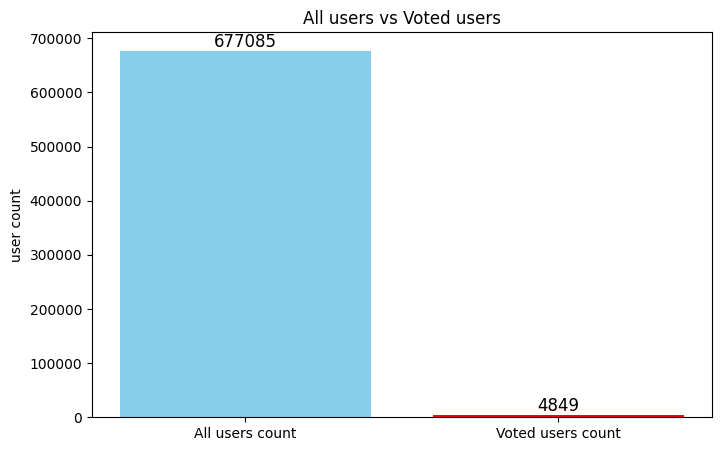

In [18]:
# 전체 유저 -> 투표 한 유저 퍼널 시각화 하기
import matplotlib.pyplot as plt
# 퍼널 시각화
labels = ['All users count', 'Voted users count']
values = [total_users_count, voted_users_count]
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'red'])
# 바 그래프 위에 숫자 표시
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=12)
plt.title('All users vs Voted users')
plt.ylabel('user count')
plt.show()

In [19]:
# import plotly.graph_objects as go

# # 단계별 값 정의 (예: 퍼널 단계)
# stages = ['All users count', 'Voted users count']
# values = [total_users_count, voted_users_count]

# # 퍼널 차트 생성
# fig = go.Figure(go.Funnel(
#     y = stages,
#     x = values,
#     textinfo = 'text',
#     texttemplate = "%{label}: %{x:,}명<br>이전 대비 %{percentPrevious:.1%}"
# ))

# fig.show()

In [20]:
# 월별 유저 수와 월별 투표한 유저 수 시각화

# 월별 유저 수와 월별 투표한 유저 수를 계산
accounts_user['created_at'] = pd.to_datetime(accounts_user['created_at'])
accounts_user['created_at_month'] = accounts_user['created_at'].dt.to_period('M')
monthly_user_count = accounts_user.groupby('created_at_month').size().reset_index(name='user_count')

accounts_userquestionrecord['created_at'] = pd.to_datetime(accounts_userquestionrecord['created_at'])
accounts_userquestionrecord['created_at_month'] = accounts_userquestionrecord['created_at'].dt.to_period('M')
monthly_voted_user_count = accounts_userquestionrecord.groupby('created_at_month')['user_id'].nunique().reset_index(name='voted_user_count')

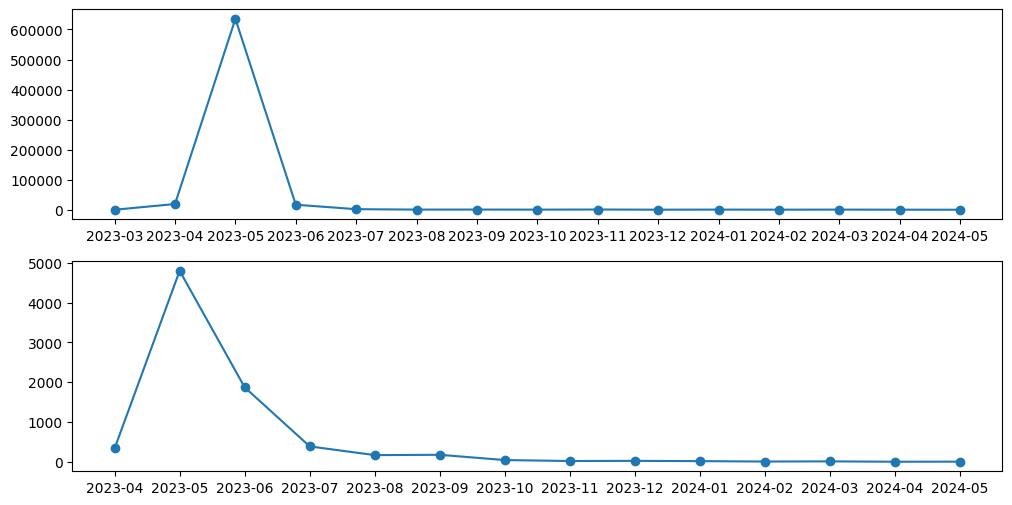

In [24]:
monthly_user_count

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(12, 6))
ax1.plot(monthly_user_count['created_at_month'].astype(str), monthly_user_count['user_count'], marker='o', label='월별 유저 수')
ax2.plot(monthly_voted_user_count['created_at_month'].astype(str), monthly_voted_user_count['voted_user_count'], marker='o', label='월별 투표한 유저 수')